In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Dataset/Billionaire.csv')

In [4]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [5]:
data.isnull().sum()


Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [6]:
data.dropna()
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [7]:
#میانگین و وارسانس سن 

In [8]:
mean_of_age = data['Age'].mean()
variance_of_age = data['Age'].std()
print(mean_of_age,'\n',variance_of_age)

63.1136023916293 
 13.4451528961593


In [9]:
#مجموع ثروت هر کشور 

In [10]:
data['NetWorth'] =  data['NetWorth'].str.strip( "$")
data['NetWorth'] = data['NetWorth'].str.strip( "B")
data['NetWorth'] = data['NetWorth'].astype(float)

In [11]:
data.head()


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [23]:
nw_countries = data.groupby("Country")['NetWorth'].sum().reset_index()
nw_countries

,Country,NetWorth
0,Algeria,4.8
1,Argentina,15.3
2,Australia,181.5
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,213.9
66,United States,4398.4
67,Venezuela,3.2
68,Vietnam,16.7


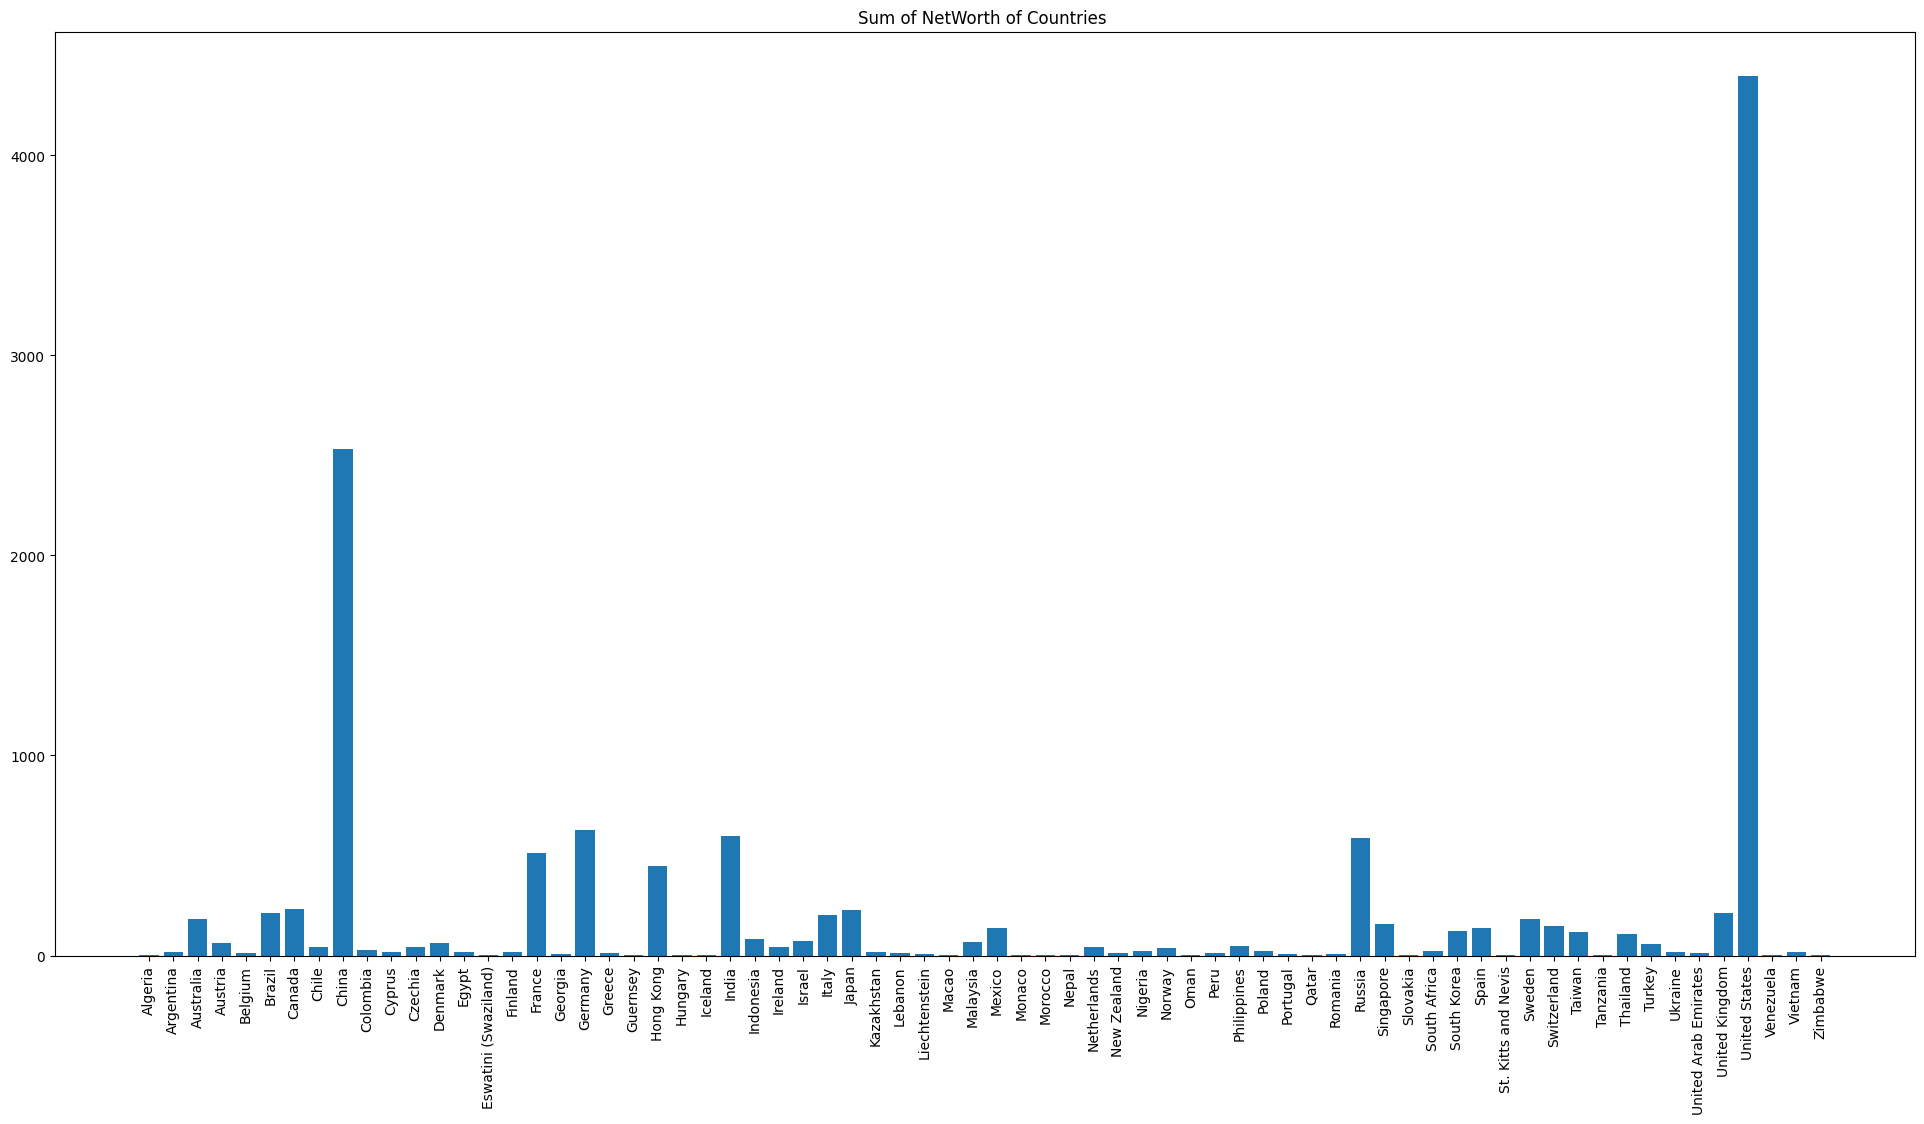

In [39]:
plt.figure(figsize=(24,12))
plt.bar(nw_countries['Country'], nw_countries['NetWorth'])
plt.title("Sum of NetWorth of Countries ")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#ده فرد اول ثروتمند آمریکایی به همراه ثروت آنها

In [54]:
dt_un = data.query("Country == 'United States'").sort_values(by = ["NetWorth"],ascending = False)[:10].reset_index()

In [55]:
dt_un

,index,Name,NetWorth,Country,Source,Rank,Age,Industry,woc
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,NaN
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,NaN
2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,NaN
3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,NaN
4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments,NaN
5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology,NaN
6,7,Larry Page,91.5,United States,Google,8,48.0,Technology,NaN
7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology,NaN
8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology,NaN
9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail,NaN


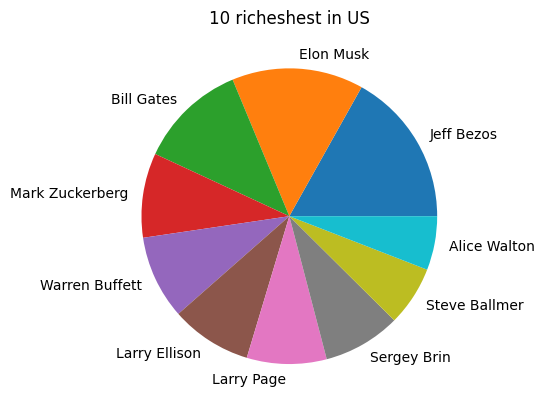

In [63]:
plt.pie(dt_un["NetWorth"],labels =  dt_un["Name"])
plt.title("10 richeshest in US")
plt.show()

In [ ]:
# ده کشوری که کمترین تعداد ثروتمند را دارند 

In [66]:
data.groupby()

,index,Country,NetWorth
0,38,Nepal,1.4
1,69,Zimbabwe,1.5
2,60,Tanzania,1.6
3,56,St. Kitts and Nevis,1.6
4,43,Oman,2.3
5,20,Guernsey,2.6
6,22,Hungary,2.7
7,52,Slovakia,2.9
8,48,Qatar,2.9
9,33,Macao,3.1


In [98]:
df = data["Country"].value_counts().tail(10).reset_index()

In [99]:
df

,Country,count
0,St. Kitts and Nevis,1
1,Tanzania,1
2,Macao,1
3,Oman,1
4,Guernsey,1
5,Venezuela,1
6,Eswatini (Swaziland),1
7,Algeria,1
8,Liechtenstein,1
9,Nepal,1


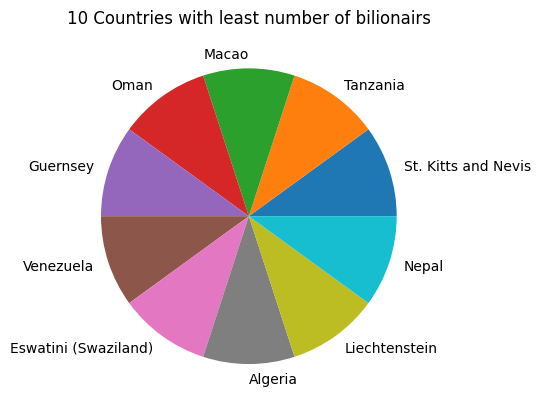

In [101]:
plt.pie(df['count'], labels = df['Country'])
plt.title('10 Countries with least number of bilionairs')
plt.show()
